# 完成したPLAを解剖する

演習課題の内容は、`PLA_dissect-JA.pdf`を参照すること。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data_perceptron_noisefree
import algo_PLA
import model_perceptron

_fontsize = "xx-large"

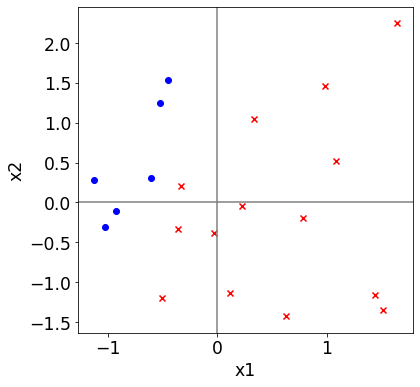

In [2]:
data = data_perceptron_noisefree.gen()

myfig = plt.figure(figsize=(6,6))

idx_one = data.y_tr[:,0] == 1
idx_zero = data.y_tr[:,0] == 0

ax = myfig.add_subplot(1,1,1)
plt.axhline(y=0.0, color="grey")
plt.axvline(x=0.0, color="grey")
ax.scatter(data.X_tr[idx_one,1], data.X_tr[idx_one,2],
        marker="o", color="blue")
ax.scatter(data.X_tr[idx_zero,1], data.X_tr[idx_zero,2],
        marker="x", color="red")
ax.tick_params(labelsize=_fontsize)
plt.xlabel("x1", size=_fontsize)
plt.ylabel("x2", size=_fontsize)

#plt.savefig(fname="slides_PLA_data_sample.pdf", bbox_inches="tight")
plt.show()

In [3]:
_t_max = 5

In [4]:
w_init = np.random.uniform(low=-0.05, high=0.05, size=(data.d_tr,1))

algo = algo_PLA.PLA(w_init=w_init, t_max=_t_max)
model = model_perceptron.Perceptron()

for onestep in algo:
    algo.update(model=model, data=data)

print("Final algorithm output:")
print(algo.w)

yhat_tr = model(X=data.X_tr, w=algo.w)
fail_check = (yhat_tr != data.y_tr).flatten()
fail_count = np.sum(fail_check)
print("Number bad = {} of {}.".format(fail_count,data.n_tr))

Final algorithm output:
[[-1.04581882]
 [-1.68746354]
 [ 0.40841813]]
Number bad = 0 of 20.


In [5]:
def classifier_2D_helper(x1,x2):
    x = np.array([1.0, x1, x2]).reshape((1,3))
    return model(X=x, w=algo.w) # depends on current algo.w!

classifier_2D = np.vectorize(classifier_2D_helper)

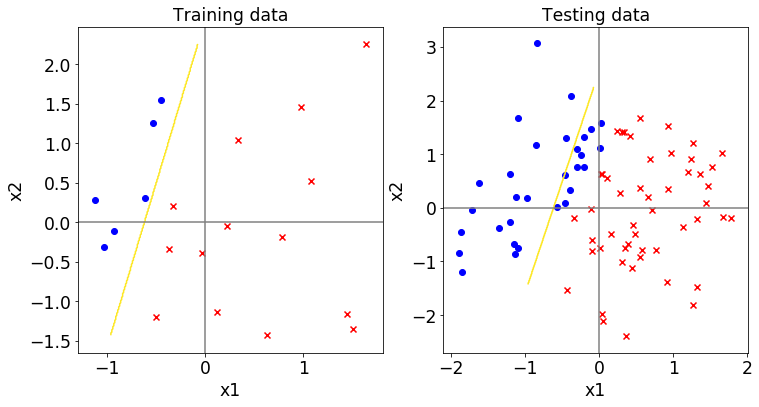

In [6]:
myfig = plt.figure(figsize=(12,6))

x1_upper = np.max(data.X_tr[:,1])
x1_lower = np.min(data.X_tr[:,1])
x2_upper = np.max(data.X_tr[:,2])
x2_lower = np.min(data.X_tr[:,2])
grid_granularity = 0.01
xx1, xx2 = np.meshgrid(np.arange(x1_lower,x1_upper,grid_granularity),
                       np.arange(x2_lower,x2_upper,grid_granularity))

zz = classifier_2D(x1=xx1, x2=xx2)

ax1 = myfig.add_subplot(1,2,1)
plt.title("Training data", size=_fontsize)
ax1.contour(xx1, xx2, zz, levels=[-0.5, 0.5])
plt.axhline(y=0.0, color="grey")
plt.axvline(x=0.0, color="grey")
idx_one = data.y_tr[:,0] == 1
idx_zero = data.y_tr[:,0] == 0
ax1.scatter(data.X_tr[idx_one,1], data.X_tr[idx_one,2],
        marker="o", color="blue")
ax1.scatter(data.X_tr[idx_zero,1], data.X_tr[idx_zero,2],
        marker="x", color="red")
ax1.tick_params(labelsize=_fontsize)
plt.xlabel("x1", size=_fontsize)
plt.ylabel("x2", size=_fontsize)

ax2 = myfig.add_subplot(1,2,2)
plt.title("Testing data", size=_fontsize)
ax2.contour(xx1, xx2, zz, levels=[-0.5, 0.5])
plt.axhline(y=0.0, color="grey")
plt.axvline(x=0.0, color="grey")
idx_one = data.y_te[:,0] == 1
idx_zero = data.y_te[:,0] == 0
ax2.scatter(data.X_te[idx_one,1], data.X_te[idx_one,2],
        marker="o", color="blue")
ax2.scatter(data.X_te[idx_zero,1], data.X_te[idx_zero,2],
        marker="x", color="red")
ax2.tick_params(labelsize=_fontsize)
plt.xlabel("x1", size=_fontsize)
plt.ylabel("x2", size=_fontsize)

#plt.savefig(fname="slides_PLA_output_sample.pdf", bbox_inches="tight")
plt.show()

___